In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('kiva_loans_20181016.csv')
df.head()

id    date             activity          sector  \
0  653051  1/1/14  Fruits & Vegetables            Food   
1  653053  1/1/14             Rickshaw  Transportation   
2  653068  1/1/14       Transportation  Transportation   
3  653063  1/1/14           Embroidery            Arts   
4  653084  1/1/14           Milk Sales            Food   

                                                 use  funded_amount  \
0            To buy seasonal, fresh fruits to sell.             300   
1  to repair and maintain the auto rickshaw used ...            575   
2  To repair their old cycle-van and buy another ...            150   
3  to purchase an embroidery machine and a variet...            200   
4                           to purchase one buffalo.            400   

   loan_amount  diff_funded_loan  status country_code   country currency  \
0          300                 0       1           PK  Pakistan      PKR   
1          575                 0       1           PK  Pakistan      PKR   
2          150                 0       1           IN     India      INR   
3          200                 0       1           PK  Pakistan      PKR   
4          400                 0       1           PK  Pakistan      PKR   

   gender borrower_genders  lender_count  term_in_months repayment_interval  \
0  female           female            12              12          irregular   
1   group   female, female            14              11          irregular   
2  female           female             6              43             bullet   
3  female           female             8              11          irregular   
4  female           female            16              14            monthly   

                           tags  
0                           NaN  
1                           NaN  
2  user_favorite, user_favorite  
3                           NaN  
4                           NaN

In [3]:
df.shape

(671205, 18)

In [4]:
df.status.value_counts()

1    622877
0     48328
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                         0
date                       0
activity                   0
sector                     0
use                     4232
funded_amount              0
loan_amount                0
diff_funded_loan           0
status                     0
country_code               8
country                    0
currency                   0
gender                  4221
borrower_genders        4221
lender_count               0
term_in_months             0
repayment_interval         0
tags                  171416
dtype: int64

# 1. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 1 - Activity)

This is done because the observed p-value of features was quite high implying a very low significance level of the features for the regression model. This method could improve the significance of features in model and accuracy.

In [7]:
df_activity = df[['status', 'activity']]
df_activity = df_activity.dropna()

df_activity = pd.get_dummies(df_activity)
df_activity.head()

## Creating X and Y for regression model and calculating coefficients
X = df_activity.drop(['status'], axis=1)
y = df_activity['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF1 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF1["Activity_Feature_Name"],myDF1["Activity_Coefficients"] = [X.columns,params]
print(myDF1)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('activity_', '') for i in df_activity.columns[1:]]
activity_features = dict(zip(keys, myDF1.Activity_Coefficients.values))

activity_coef = [activity_features[i] for i in df.activity.values]
df['activity_coef'] = activity_coef
df



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


             Activity_Feature_Name  Activity_Coefficients
0              activity_Adult Care                 0.0798
1             activity_Agriculture                -0.5987
2        activity_Air Conditioning                -0.0285
3            activity_Animal Sales                -0.2070
4             activity_Aquaculture                -0.5387
5                    activity_Arts                 0.5732
6             activity_Auto Repair                -1.1636
7                  activity_Bakery                -0.0646
8            activity_Balut-Making                 1.1045
9             activity_Barber Shop                -0.9150
10           activity_Beauty Salon                -0.6690
11             activity_Beekeeping                -0.0949
12              activity_Beverages                -0.6162
13         activity_Bicycle Repair                 1.6725
14          activity_Bicycle Sales                 1.0377
15             activity_Blacksmith                 1.6599
16            

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 2. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 2 - Sector)

In [8]:
df_sector = df[['status', 'sector']]
df_sector = df_sector.dropna()

df_sector = pd.get_dummies(df_sector)
print (df_sector.head())
print (df_sector.shape)

## Creating X and Y for regression model and calculating coefficients
X = df_sector.drop(['status'], axis=1)
y = df_sector['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF2 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF2["Sector_Feature_Name"],myDF2["Sector_Coefficients"] = [X.columns,params]
print(myDF2)

## Replacing/appending the coefficients in the original dataset

keys = [i.replace('sector_', '') for i in df_sector.columns[1:]]
sector_features = dict(zip(keys, myDF2.Sector_Coefficients.values))

sector_coef = [sector_features[i] for i in df.sector.values]
df['sector_coef'] = sector_coef
df

   status  sector_Agriculture  sector_Arts  sector_Clothing  \
0       1                   0            0                0   
1       1                   0            0                0   
2       1                   0            0                0   
3       1                   0            1                0   
4       1                   0            0                0   

   sector_Construction  sector_Education  sector_Entertainment  sector_Food  \
0                    0                 0                     0            1   
1                    0                 0                     0            0   
2                    0                 0                     0            0   
3                    0                 0                     0            0   
4                    0                 0                     0            1   

   sector_Health  sector_Housing  sector_Manufacturing  sector_Personal Use  \
0              0               0                     0             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


      Sector_Feature_Name  Sector_Coefficients
0      sector_Agriculture              -0.1947
1             sector_Arts               1.3756
2         sector_Clothing              -0.3865
3     sector_Construction               0.1980
4        sector_Education               0.9738
5    sector_Entertainment              -0.7447
6             sector_Food               0.0824
7           sector_Health              -0.0443
8          sector_Housing              -0.6803
9    sector_Manufacturing               2.1667
10    sector_Personal Use               0.4880
11          sector_Retail              -0.2772
12        sector_Services              -0.3239
13  sector_Transportation              -0.6043
14       sector_Wholesale               0.6562


id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 3. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 3 - Country)

In [9]:
df_country = df[['status', 'country']]
df_country = df_country.dropna()

df_country = pd.get_dummies(df_country)
print (df_country.head())
print (df_country.shape)

## Creating X and Y for regression model and calculating coefficients

X = df_country.drop(['status'], axis=1)
y = df_country['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF3 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF3["Country_Feature_Name"],myDF3["Country_Coefficients"] = [X.columns,params]
print(myDF3)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('country_', '') for i in df_country.columns[1:]]
country_features = dict(zip(keys, myDF3.Country_Coefficients.values))

country_coef = [country_features[i] for i in df.country.values]
df['country_coef'] = country_coef
df

   status  country_Afghanistan  country_Albania  country_Armenia  \
0       1                    0                0                0   
1       1                    0                0                0   
2       1                    0                0                0   
3       1                    0                0                0   
4       1                    0                0                0   

   country_Azerbaijan  country_Belize  country_Benin  country_Bhutan  \
0                   0               0              0               0   
1                   0               0              0               0   
2                   0               0              0               0   
3                   0               0              0               0   
4                   0               0              0               0   

   country_Bolivia  country_Brazil        ...         country_Turkey  \
0                0               0        ...                      0   
1             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            Country_Feature_Name  Country_Coefficients
0                            country_Afghanistan                0.0850
1                                country_Albania               -0.9851
2                                country_Armenia               -1.6793
3                             country_Azerbaijan               -1.3181
4                                 country_Belize                1.4493
5                                  country_Benin                1.3452
6                                 country_Bhutan               -0.7850
7                                country_Bolivia               -1.1925
8                                 country_Brazil                1.4128
9                           country_Burkina Faso                0.7313
10                               country_Burundi               -0.5710
11                              country_Cambodia                0.1966
12                              country_Cameroon               -0.3654
13    

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# Processing the dataframe for model now.

In [10]:
df1 = df[['status','funded_amount', 'loan_amount', 'activity_coef', 'sector_coef',  'country_coef',
         'currency','gender','term_in_months']]

In [11]:
df1.head(2)

status  funded_amount  loan_amount  activity_coef  sector_coef  \
0       1            300          300         0.1499       0.0824   
1       1            575          575        -0.6277      -0.6043   

   country_coef currency  gender  term_in_months  
0       -0.4427      PKR  female              12  
1       -0.4427      PKR   group              11

In [12]:
df2 = df1.dropna()
df2 = df2.drop(['funded_amount', 'currency'], axis=1)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  gender  \
0       1          300         0.1499       0.0824       -0.4427  female   
1       1          575        -0.6277      -0.6043       -0.4427   group   
2       1          150        -0.8138      -0.6043        0.5117  female   
3       1          200         0.6553       1.3756       -0.4427  female   
4       1          400         0.2808       0.0824       -0.4427  female   

   term_in_months  
0              12  
1              11  
2              43  
3              11  
4              14

In [13]:
df2.shape

(666984, 7)

In [14]:
# Use Pandas get_dummies to convert categorical data

df2 = pd.get_dummies(df2)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  \
0       1          300         0.1499       0.0824       -0.4427   
1       1          575        -0.6277      -0.6043       -0.4427   
2       1          150        -0.8138      -0.6043        0.5117   
3       1          200         0.6553       1.3756       -0.4427   
4       1          400         0.2808       0.0824       -0.4427   

   term_in_months  gender_female  gender_group  gender_male  
0              12              1             0            0  
1              11              0             1            0  
2              43              1             0            0  
3              11              1             0            0  
4              14              1             0            0

In [15]:
df2.shape

(666984, 9)

In [16]:
df2.shape[1]

9

# Data Pre-Processing

In [17]:
X = df2.drop(['status'], axis=1)
feature_names = X.columns
y = df2['status']
print(X.shape, y.shape)

(666984, 8) (666984,)


It is really important to scale our data before using multilayer perceptron models.
Without scaling, it is often difficult for the training cycle to converge

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train, num_classes=2) #####
y_test_categorical = to_categorical(encoded_y_test,num_classes=2) ####

Using TensorFlow backend.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [19]:
y_train_categorical.shape

(500238, 2)

In [20]:
y.value_counts()

1    619338
0     47646
Name: status, dtype: int64

# Keras - Deep Learning - Sequential Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=2, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data = (X_test_scaled, y_test_categorical),
    epochs=40,
    shuffle=True,
    verbose=1
)

Train on 500238 samples, validate on 166746 samples
Epoch 1/40
500238/500238 [==============================] - 33s 66us/step - loss: 0.1998 - acc: 0.9283 - val_loss: 0.1958 - val_acc: 0.9286
Epoch 2/40
500238/500238 [==============================] - 32s 65us/step - loss: 0.1949 - acc: 0.9285 - val_loss: 0.1940 - val_acc: 0.9283
Epoch 3/40
500238/500238 [==============================] - 32s 65us/step - loss: 0.1938 - acc: 0.9285 - val_loss: 0.1925 - val_acc: 0.9288
Epoch 4/40
500238/500238 [==============================] - 33s 65us/step - loss: 0.1930 - acc: 0.9285 - val_loss: 0.1917 - val_acc: 0.9286
Epoch 5/40
500238/500238 [==============================] - 32s 64us/step - loss: 0.1924 - acc: 0.9285 - val_loss: 0.1920 - val_acc: 0.9285
Epoch 6/40
500238/500238 [==============================] - 32s 63us/step - loss: 0.1919 - acc: 0.9286 - val_loss: 0.1917 - val_acc: 0.9288
Epoch 7/40
500238/500238 [==============================] - 32s 64us/step - loss: 0.1915 - acc: 0.9286 - val

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


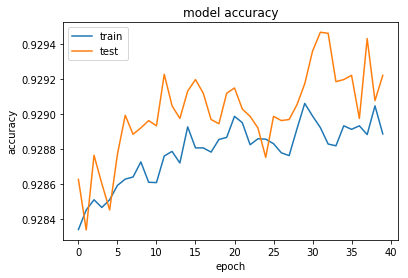

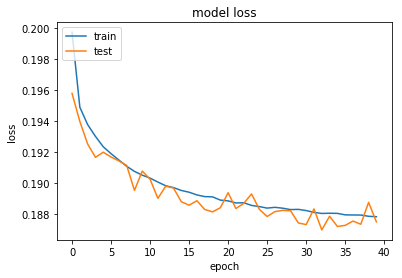

In [24]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model.
From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test) around 5 or 15 epochs. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

# Quantify our Trained Model

In [25]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.18749637858602097, Accuracy: 0.9292216904710443


# Make Predictions

In [26]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [27]:
# print(f"Predicted classes: {prediction_labels}")
# print(f"Actual Labels: {list(y_test)}")

In [28]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
y_test_categorical[:,1]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical[:,1], prediction_labels))

              precision    recall  f1-score   support

         0.0       0.55      0.05      0.10     11911
         1.0       0.93      1.00      0.96    154835

   micro avg       0.93      0.93      0.93    166746
   macro avg       0.74      0.52      0.53    166746
weighted avg       0.90      0.93      0.90    166746



In [30]:
# A = y_test_categorical[:,1].astype(np.float)

A = np.asfarray(y_test_categorical[:,1], float)

np.around(A,decimals=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:

df4 = pd.DataFrame({"Prediction": prediction_labels, "Actual": y_test_categorical[:,1]}).reset_index(drop=True)

In [32]:
df4.head(10)

Prediction  Actual
0           1     1.0
1           1     1.0
2           1     1.0
3           1     1.0
4           1     1.0
5           1     1.0
6           1     1.0
7           1     1.0
8           1     1.0
9           1     1.0

# Passing Real Time Feature Data for Testing on the Model.

In [33]:
myDF1.set_index("Activity_Feature_Name", inplace=True)
myDF2.set_index("Sector_Feature_Name", inplace=True)
myDF3.set_index("Country_Feature_Name", inplace=True)

print (myDF1.head())
print ("------------"*5)
print (myDF2.head())
print ("------------"*5)
print (myDF3.head())

                           Activity_Coefficients
Activity_Feature_Name                           
activity_Adult Care                       0.0798
activity_Agriculture                     -0.5987
activity_Air Conditioning                -0.0285
activity_Animal Sales                    -0.2070
activity_Aquaculture                     -0.5387
------------------------------------------------------------
                     Sector_Coefficients
Sector_Feature_Name                     
sector_Agriculture               -0.1947
sector_Arts                       1.3756
sector_Clothing                  -0.3865
sector_Construction               0.1980
sector_Education                  0.9738
------------------------------------------------------------
                      Country_Coefficients
Country_Feature_Name                      
country_Afghanistan                 0.0850
country_Albania                    -0.9851
country_Armenia                    -1.6793
country_Azerbaijan               

In [34]:
# Collecting / Inputing new data for testing status
input_country = "country_" + "India"
input_activity = "activity_" + "Agriculture"
input_sector = "sector_" + "Agriculture"
input_gender = "1" # if male 1, female 0 

print (input_country +"  " + input_activity + "  " + input_sector )


# Collecting the coeficients for the categorical inputs country, activity and sector

inputs = {'gender_male' :    input_gender, 
          'activity_coef' :  myDF1.loc[input_activity], 
          'sector_coef':     myDF2.loc[input_sector],
          'country_coef' :   myDF3.loc[input_country]
         }

# Replacing the new input data in the model format for testing

test = pd.Series(index=df2.columns)
for key in inputs.keys():
    test[key] = inputs[key]
    
test.fillna(0, inplace=True)

country_India  activity_Agriculture  sector_Agriculture


In [35]:
test1 = test.drop(['status'])

In [36]:
encoded_predictions = model.predict_classes(test1.values.reshape(1, -1))
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")

predictions = model.predict_proba(test1.values.reshape(1, -1))
print (predictions)

Predicted classes: [1]
[[0.13210256 0.86789745]]


# Retraining the model with lower epochs

Train on 500238 samples, validate on 166746 samples
Epoch 1/18
500238/500238 [==============================] - 31s 62us/step - loss: 0.1879 - acc: 0.9288 - val_loss: 0.1879 - val_acc: 0.9291
Epoch 2/18
500238/500238 [==============================] - 31s 62us/step - loss: 0.1878 - acc: 0.9289 - val_loss: 0.1875 - val_acc: 0.9291
Epoch 3/18
500238/500238 [==============================] - 31s 62us/step - loss: 0.1878 - acc: 0.9289 - val_loss: 0.1870 - val_acc: 0.9295
Epoch 4/18
500238/500238 [==============================] - 31s 61us/step - loss: 0.1878 - acc: 0.9290 - val_loss: 0.1868 - val_acc: 0.9294
Epoch 5/18
500238/500238 [==============================] - 31s 62us/step - loss: 0.1879 - acc: 0.9289 - val_loss: 0.1876 - val_acc: 0.9294
Epoch 6/18
500238/500238 [==============================] - 31s 61us/step - loss: 0.1877 - acc: 0.9290 - val_loss: 0.1878 - val_acc: 0.9291
Epoch 7/18
500238/500238 [==============================] - 31s 62us/step - loss: 0.1876 - acc: 0.9289 - val

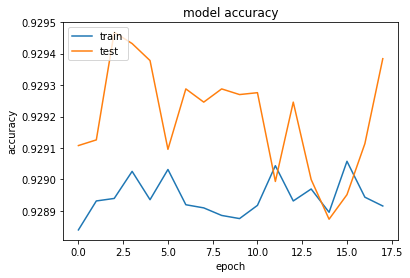

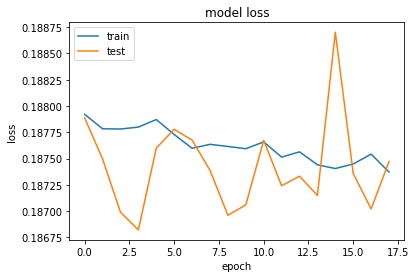

In [37]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data = (X_test_scaled, y_test_categorical),
    epochs=18,
    shuffle=True,
    verbose=1
)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

print(classification_report(y_test_categorical[:,1], prediction_labels))

              precision    recall  f1-score   support

         0.0       0.60      0.03      0.07     11911
         1.0       0.93      1.00      0.96    154835

   micro avg       0.93      0.93      0.93    166746
   macro avg       0.76      0.52      0.51    166746
weighted avg       0.91      0.93      0.90    166746



# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension .h5

In [39]:
# Save the model
model.save("ML-Model-Set2-5-KerasDeepLearning-model-trained.h5")